In [1]:
import numpy as np
import pymultinest

import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline

import json

import corner

import retrieval_base.auxiliary_functions as af

def read_results(prefix, n_params):

    # Set-up analyzer object
    analyzer = pymultinest.Analyzer(
        n_params=n_params, 
        outputfiles_basename=prefix
        )
    stats = analyzer.get_stats()

    # Load the equally-weighted posterior distribution
    posterior = analyzer.get_equal_weighted_posterior()
    posterior = posterior[:,:-1]

    # Read the parameters of the best-fitting model
    bestfit = np.array(stats['modes'][0]['maximum a posterior'])

    PT = af.pickle_load(prefix+'data/bestfit_PT.pkl')
    Chem = af.pickle_load(prefix+'data/bestfit_Chem.pkl')

    m_spec = af.pickle_load(prefix+'data/bestfit_m_spec.pkl')
    d_spec = af.pickle_load(prefix+'data/d_spec.pkl')

    LogLike = af.pickle_load(prefix+'data/bestfit_LogLike.pkl')

    try:
        Cov = af.pickle_load(prefix+'data/bestfit_Cov.pkl')
    except:
        Cov = None

    int_contr_em           = np.load(prefix+'data/bestfit_int_contr_em.npy')
    int_contr_em_per_order = np.load(prefix+'data/bestfit_int_contr_em_per_order.npy')
    int_opa_cloud          = np.load(prefix+'data/bestfit_int_opa_cloud.npy')

    f = open(prefix+'data/bestfit.json')
    bestfit_params = json.load(f)
    f.close()

    print(posterior.shape)
    return posterior, bestfit, PT, Chem, int_contr_em, int_contr_em_per_order, int_opa_cloud, m_spec, d_spec, LogLike, Cov, bestfit_params

In [2]:
res = read_results(
    prefix='./retrieval_outputs/DENIS_J0255_nominal_5/test_', n_params=32
    )
posterior_1, bestfit_1, PT_1, Chem_1, int_contr_em_1, int_contr_em_per_order_1, int_opa_cloud_1, m_spec_1, d_spec_1, LogLike_1, Cov_1, bestfit_params_1 = res

res = read_results(
    prefix='./retrieval_outputs/DENIS_J0255_high_pass/test_', n_params=32
    )
posterior_high_pass, bestfit_high_pass, PT_high_pass, Chem_high_pass, int_contr_em_high_pass, int_contr_em_per_order_high_pass, int_opa_cloud_high_pass, m_spec_high_pass, d_spec_high_pass, LogLike_high_pass, Cov_high_pass, bestfit_params_high_pass = res

res = read_results(
    prefix='./retrieval_outputs/DENIS_J0255_Line/test_', n_params=32
    )
_, _, PT_Line, _, int_contr_em_Line, *_ = res

res = read_results(
    prefix='./retrieval_outputs/DENIS_J0255_MS09_2/test_', n_params=32
    )
_, _, PT_MS09, _, int_contr_em_MS09, *_ = res
del res, m_spec_1, d_spec_1, m_spec_high_pass, d_spec_high_pass

  analysing data from ./retrieval_outputs/DENIS_J0255_nominal_5/test_.txt
(4331, 32)
  analysing data from ./retrieval_outputs/DENIS_J0255_high_pass/test_.txt
(4807, 32)
  analysing data from ./retrieval_outputs/DENIS_J0255_Line/test_.txt
(4468, 39)
  analysing data from ./retrieval_outputs/DENIS_J0255_MS09_2/test_.txt
(3942, 29)


In [3]:
posterior_color_1 = '#8B077C'

envelope_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    name='envelope_cmap', colors=[posterior_color_1, posterior_color_1], 
    )
envelope_colors_1 = envelope_cmap([0.0,0.2,0.4,0.6,0.8])
envelope_colors_1[:,-1] = np.array([0.0,0.2,0.4,0.6,0.8])

# ================================

#posterior_color_high_pass = '#bd0502'
#posterior_color_high_pass = 'green'
posterior_color_high_pass = 'C2'

envelope_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    name='envelope_cmap', colors=[posterior_color_high_pass, posterior_color_high_pass], 
    )
envelope_colors_high_pass = envelope_cmap([0.0,0.2,0.4,0.6,0.8])
envelope_colors_high_pass[:,-1] = np.array([0.0,0.2,0.4,0.6,0.8])

In [4]:
q = np.array([
    0.5-0.997/2, 0.5-0.95/2, 0.5-0.68/2, 0.5, 
    0.5+0.68/2, 0.5+0.95/2, 0.5+0.997/2
    ])

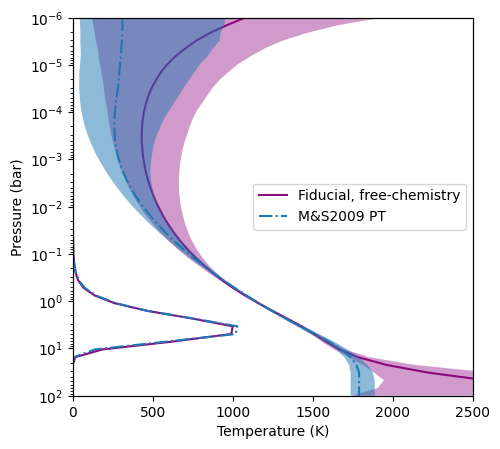

In [8]:
fig, ax = plt.subplots(
    figsize=(5,4.5), 
    gridspec_kw={
        'left':0.15, 'right':0.95, 'top':0.95, 'bottom':0.11
        }, 
    )

ax.fill_betweenx(
    PT_1.pressure, PT_1.temperature_envelopes[1], PT_1.temperature_envelopes[5], 
    fc=envelope_colors_1[2], ec='none', zorder=1
    )
ax.plot(
    PT_1.temperature_envelopes[3], PT_1.pressure, c=posterior_color_1, 
    label='Fiducial, free-chemistry', zorder=1
    )

'''
ax.fill_betweenx(
    PT_Line.pressure, PT_Line.temperature_envelopes[1], PT_Line.temperature_envelopes[5], 
    fc='C0', ec='none', zorder=2, alpha=0.5
    )
ax.plot(
    PT_Line.temperature_envelopes[3], PT_Line.pressure, 
    c='C0', ls='-.', label='Line+2015 PT', zorder=2
    )
'''

ax.fill_betweenx(
    PT_MS09.pressure, PT_MS09.temperature_envelopes[1], PT_MS09.temperature_envelopes[5], 
    fc='C0', ec='none', zorder=2, alpha=0.5
    )
ax.plot(
    PT_MS09.temperature_envelopes[3], PT_MS09.pressure, 
    c='C0', ls='-.', label='M&S2009 PT', zorder=2
    )

ax_contr = ax.twiny()
ax_contr.plot(int_contr_em_1, PT_1.pressure, ls='-', c=posterior_color_1)
#ax_contr.plot(int_contr_em_Line, PT_Line.pressure, ls='-.', c='C0')
ax_contr.plot(int_contr_em_MS09, PT_MS09.pressure, ls='-.', c='C0')
ax_contr.set(xlim=(0,2.5*np.max(int_contr_em_1)), xticks=[])

ax.legend(loc='center right')
ax.set(
    yscale='log', ylim=(1e2,1e-6), xlim=(0,2500), 
    xlabel='Temperature (K)', ylabel='Pressure (bar)'
    )
#plt.savefig('./plots/PT_Line_comparison.pdf')
plt.savefig('./plots/PT_MS09_comparison.pdf')
plt.show()
plt.close()

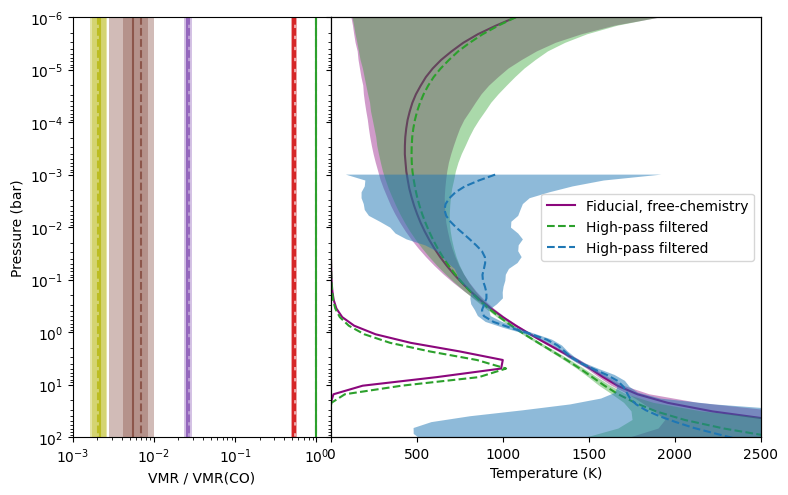

In [6]:
fig, ax = plt.subplots(
    figsize=(8,5), ncols=2, sharey=True, 
    gridspec_kw={
        'wspace':0, 'width_ratios':[3,5], 
        'left':0.1, 'right':0.96, 'top':0.95, 'bottom':0.11
        }, 
    )
# ------------------------------------
ax[1].fill_betweenx(
    PT_1.pressure, PT_1.temperature_envelopes[1], PT_1.temperature_envelopes[5], 
    fc=envelope_colors_1[2], ec='none', zorder=1
    )
ax[1].plot(
    PT_1.temperature_envelopes[3], PT_1.pressure, c=posterior_color_1, 
    label='Fiducial, free-chemistry', zorder=1
    )

ax[1].fill_betweenx(
    PT_high_pass.pressure, PT_high_pass.temperature_envelopes[1], PT_high_pass.temperature_envelopes[5], 
    fc=envelope_colors_high_pass[2], ec='none', zorder=2
    )
ax[1].plot(
    PT_high_pass.temperature_envelopes[3], PT_high_pass.pressure, 
    c=posterior_color_high_pass, ls='--', label='High-pass filtered', zorder=2
    )

ax_contr = ax[1].twiny()
ax_contr.plot(int_contr_em_1, PT_1.pressure, ls='-', c=posterior_color_1)
ax_contr.plot(int_contr_em_high_pass, PT_high_pass.pressure, ls='--', c=posterior_color_high_pass)
ax_contr.set(xlim=(0,2.5*np.max(int_contr_em_1)), xticks=[])

ax[1].legend(loc='center right')
ax[1].set(
    yscale='log', ylim=(1e2,1e-6), xlim=(0,2500), 
    xlabel='Temperature (K)'
    )

# ------------------------------------
masses = {
    'CO_main_iso':12+16, 'H2O_pokazatel_main_iso':2+16, 'CH4_hargreaves_main_iso':12+4, 
    'NH3_coles_main_iso':14+3, 'CO_36':13+16, #'HCN_main_iso':
    }
colors = {
    'CO_main_iso':'C2', 'H2O_pokazatel_main_iso':'C3', 'CH4_hargreaves_main_iso':'C4', 
    'NH3_coles_main_iso':'C8', 'CO_36':'C5', #'HCN_main_iso':
    }

MMW = Chem_1.mass_fractions_posterior['MMW']
VMR_CO = MMW / (12+16) * Chem_1.mass_fractions_posterior['CO_main_iso']

for key_i, mf_i in Chem_1.mass_fractions_posterior.items():
    
    mass_i = masses.get(key_i)
    if mass_i is None:
        continue

    VMR_i = MMW / mass_i * mf_i
    VMR_env_i = np.quantile(VMR_i/VMR_CO, q=q, axis=0)
    
    ax[0].fill_betweenx(
        PT_1.pressure, VMR_env_i[1], VMR_env_i[5], fc=colors[key_i], ec='none', alpha=0.4
        #PT_1.pressure, VMR_env_i[2], VMR_env_i[4], fc=colors[key_i], ec='none', alpha=0.4
        )
    ax[0].plot(VMR_env_i[3], PT_1.pressure, c=colors[key_i])


VMR_CO = 10**posterior_high_pass[:,16]

for i, key_i in [(16,'CO_main_iso'), (17,'H2O_pokazatel_main_iso'), (18,'CH4_hargreaves_main_iso'), (19,'NH3_coles_main_iso'), (20,'CO_36')]:
    
    mass_i = masses.get(key_i)
    if mass_i is None:
        continue

    VMR_i = 10**posterior_high_pass[:,i]
    VMR_env_i = np.quantile(VMR_i/VMR_CO, q=q, axis=0)

    VMR_env_i = VMR_env_i[:,None] * np.ones_like(PT_high_pass.pressure)[None,:]

    ax[0].fill_betweenx(
        PT_high_pass.pressure, VMR_env_i[1], VMR_env_i[5], fc=colors[key_i], ec='none', alpha=0.4, 
        #PT_high_pass.pressure, VMR_env_i[2], VMR_env_i[4], fc=colors[key_i], ec='none', alpha=0.4, 
        )
    ax[0].plot(VMR_env_i[3], PT_high_pass.pressure, c=colors[key_i], ls='--')

ax[0].set(
    xscale='log', xlim=(1e-3,1.5e0), 
    ylabel='Pressure (bar)', 
    xlabel='VMR / VMR(CO)'
    )
plt.savefig('./plots/chemistry_PT_high_pass.pdf')
plt.show()
plt.close()

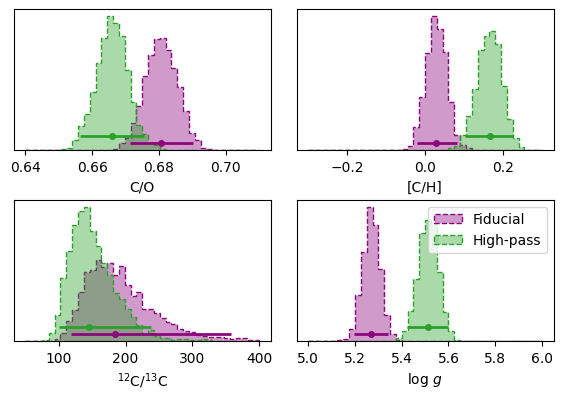

In [151]:
def plot_hist1d(ax, posterior, ec, fc, xrange, bins=40, ls='-', ymarker=0.05, label=None):

    q = np.array([0.5-0.997/2, 0.5-0.95/2, 0.5-0.68/2, 0.5, 0.5+0.68/2, 0.5+0.95/2, 0.5+0.997/2])

    _, _, p = ax.hist(
        posterior, bins=bins, range=xrange, histtype='step', fill=True, 
        ec=ec, fc=fc, ls=ls, label=label, zorder=-1
        )

    median = np.median(posterior)
    xerr = np.abs(np.quantile(posterior, q=q[[1,-2]])-median)[:,None]
    ax.errorbar(
        median, ymarker, xerr=xerr, fmt='o', 
        c=ec, capthick=2, elinewidth=2, markersize=4, 
        transform=ax.get_xaxis_transform(), 
        )

    #xerr = np.abs(np.quantile(posterior, q=q[[2,-3, 1,-2, 0,-1]])-median)[:,None]
    #print('{:} | -{:}+{:} | -{:}+{:} | -{:}+{:}'.format(median, *xerr.flatten()))

    return p[0]

#Chem_high_pass.CO_posterior
fig, ax = plt.subplots(
    figsize=(6,4), ncols=2, nrows=2, 
    gridspec_kw={
        'wspace':0.1, 'hspace':0.35, 
        'left':0.05, 'right':0.95, 'top':0.96, 'bottom':0.13
        }, 
    )
for ax_i in np.array(list(ax)).flatten():
    ax_i.set(yticks=[])

plot_hist1d(
    ax[0,0], Chem_1.CO_posterior, ec=posterior_color_1, 
    fc=envelope_colors_1[2], ls='--', xrange=(0.64,0.71)
    )
plot_hist1d(
    ax[0,0], Chem_high_pass.CO_posterior, ec=posterior_color_high_pass, 
    fc=envelope_colors_high_pass[2], ls='--', xrange=(0.64,0.71), ymarker=0.1
    )
ax[0,0].set(xlabel='C/O')

plot_hist1d(
    ax[0,1], Chem_1.FeH_posterior, ec=posterior_color_1, 
    fc=envelope_colors_1[2], ls='--', xrange=(-0.3,0.3)
    )
plot_hist1d(
    ax[0,1], Chem_high_pass.FeH_posterior, ec=posterior_color_high_pass, 
    fc=envelope_colors_high_pass[2], ls='--', xrange=(-0.3,0.3), ymarker=0.1
    )
ax[0,1].set(xlabel='[C/H]')

Chem_1.C_ratio_posterior = 10**posterior_1[:,16] / 10**posterior_1[:,20]
Chem_high_pass.C_ratio_posterior = 10**posterior_high_pass[:,16] / 10**posterior_high_pass[:,20]

plot_hist1d(
    ax[1,0], Chem_1.C_ratio_posterior, ec=posterior_color_1, 
    fc=envelope_colors_1[2], ls='--', xrange=(50,400)
    )
plot_hist1d(
    ax[1,0], Chem_high_pass.C_ratio_posterior, ec=posterior_color_high_pass, 
    fc=envelope_colors_high_pass[2], ls='--', xrange=(50,400), ymarker=0.1
    )
ax[1,0].set(xlabel=r'$^{12}$C/$^{13}$C')

plot_hist1d(
    ax[1,1], posterior_1[:,9], ec=posterior_color_1, 
    fc=envelope_colors_1[2], ls='--', xrange=(5,6), 
    label='Fiducial'
    )
plot_hist1d(
    ax[1,1], posterior_high_pass[:,9], ec=posterior_color_high_pass, 
    fc=envelope_colors_high_pass[2], ls='--', xrange=(5,6), ymarker=0.1, 
    label='High-pass'
    )
ax[1,1].legend(loc='upper right')
ax[1,1].set(xlabel=r'log $g$')
plt.savefig('./plots/high_pass_posterior.pdf')
plt.show()
plt.close()

In [4]:
bins = 20

indices = [8,9,16,20,17,18,19,10,11,12]
labels = [
    r'$R\ (R_\mathrm{Jup})$', #r'$R$', 
    r'$\log\ g$', #r'$\log\ g\ (\mathrm{cm\ s^{-2}})$',
    r'$\log\ \mathrm{^{12}CO}$', 
    r'$\log\ ^{13}\mathrm{CO}$', 
    r'$\log\ \mathrm{H_2O}$', 
    r'$\log\ \mathrm{CH_4}$', 
    r'$\log\ \mathrm{NH_3}$', 
    r'$\varepsilon_\mathrm{limb}$', 
    r'$v\ \sin i\ (\mathrm{km\ s^{-1}})$', 
    r'$v_\mathrm{rad}\ (\mathrm{km\ s^{-1}})$', 
    ]

# Compute the 0.16, 0.5, and 0.84 quantiles
param_quantiles = np.array(
    [af.quantiles(posterior_high_pass[:,i], q=[0.16,0.5,0.84]) \
     for i in range(posterior_high_pass.shape[1])]
    )
# Base the axes-limits off of the quantiles
param_range = np.array(
    #[(3*(q_i[0]-q_i[1])+q_i[1], 3*(q_i[2]-q_i[1])+q_i[1]) for q_i in param_quantiles]
    #[(4*(q_i[0]-q_i[1])+q_i[1], 4*(q_i[2]-q_i[1])+q_i[1]) for q_i in param_quantiles]
    #[(5*(q_i[0]-q_i[1])+q_i[1], 5*(q_i[2]-q_i[1])+q_i[1]) for q_i in param_quantiles]
    [(10*(q_i[0]-q_i[1])+q_i[1], 10*(q_i[2]-q_i[1])+q_i[1]) for q_i in param_quantiles]
    )

param_range = np.array([
    (0.68,0.82), 
    (5.15,5.5), 
    (-3.41,-3.23), 
    (-6.0,-5.25), 
    (-3.7,-3.5), 
    (-5.03,-4.76), 
    (-6.15,-5.75), 
    (0.48,0.75), 
    (39.65,41.75), 
    (22.25,22.8), 
])

fig = plt.figure(figsize=(11,11))

fig = corner.corner(
    posterior_1[:,[8,9,16,20,17,18,19,10,11,12]], 
    fig=fig, 
    
    labels=labels, 
    show_titles=True, 
    use_math_text=True, 
    title_fmt='.2f', 
    title_kwargs={'fontsize':10},#, 'loc':'left', 'x':0.05}, 
    labelpad=0.18, 
    #range=param_range[indices], 
    range=param_range, 
    bins=bins, 
    max_n_ticks=2, 

    #quantiles=[0.16,0.84,0.50], 
    color=posterior_color_1, 
    linewidths=0.5, 
    hist_kwargs={
        'edgecolor':envelope_colors_1[3], 
        'facecolor':np.concatenate((envelope_colors_1[1,:3],[0.1])), 
        'fill':True, 
        'linewidth':0.7
        #'alpha':0.5
        }, 

    fill_contours=False, 
    #fill_contours=True, 
    plot_datapoints=False,  
    #plot_datapoints=True,  
    plot_density=False, 
    no_fill_contours=True, 
    #no_fill_contours=False, 
    smooth=False, 
    contourf_kwargs={'colors':envelope_colors_1}, 
    #contour_kwargs={'linewidths':1, 'colors':envelope_colors_1[3]}, 
    contour_kwargs={'linewidths':0.7, 'colors':envelope_colors_1[2]},
    )

fig = corner.corner(
    posterior_high_pass[:,indices], 
    fig=fig, 
    
    labels=labels, 
    show_titles=True, 
    use_math_text=True, 
    title_fmt='.2f', 
    title_kwargs={'fontsize':10},#, 'loc':'left', 'x':0.05}, 
    labelpad=0.18, 
    #range=param_range[indices], 
    range=param_range, 
    bins=bins, 
    max_n_ticks=2, 

    quantiles=[0.16,0.84,0.50], 
    color=posterior_color_high_pass, 
    linewidths=0.5, 
    hist_kwargs={
        'edgecolor':posterior_color_high_pass, 
        'facecolor':envelope_colors_high_pass[1], 
        'fill':True
        }, 

    #levels=(1-np.exp(-0.5),),
    fill_contours=True, 
    plot_datapoints=True, 
    #plot_datapoints=False, 

    contourf_kwargs={'colors':envelope_colors_high_pass}, 
    smooth=False, 

    contour_kwargs={'linewidths':0.5}, 
    )

# Add the truth values
#corner.overplot_lines(fig, [0.8,5.25,-3.3,-5.5,-3.6,-4.9,-6.0,0.65,41.0,22.5], c='darkorange', lw=1)

# Reshape the axes to a square matrix
ax = np.array(fig.axes)
ax = ax.reshape((int(np.sqrt(len(ax))), int(np.sqrt(len(ax)))))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].tick_params(top=(i!=j), right=(i!=j), direction='inout')

for i in range(ax.shape[0]):
    # Change linestyle of 16/84th percentile in histograms
    ax[i,i].get_lines()[0].set(linewidth=1, linestyle=(5,(5,5)))
    ax[i,i].get_lines()[1].set(linewidth=1, linestyle=(5,(5,5)))

    ax[i,i].get_lines()[2].set(linewidth=1, linestyle='-')

    ax[i,i].set_title(ax[i,i].get_title().replace(' = ', '\n'), fontsize=11)

    # Adjust the axis-limits
    for j in range(i):
        #ax[i,j].set(ylim=param_range[indices][i])
        ax[i,j].set(ylim=param_range[i])
    for h in range(ax.shape[0]):
        #ax[h,i].set(xlim=param_range[indices][i])
        ax[h,i].set(xlim=param_range[i])

    new_label = ax[-1,i].get_xlabel()
    if ('\ (' in new_label) and (')' in new_label):
        new_label, new_label_end = new_label.split('\ (')[:-1], new_label.split('\ (')[-1]
        new_label.append(new_label_end.split(')')[-1])
        new_label = ''.join(new_label)

    ax[-1,i].set_xlabel(new_label, fontsize=11)

    new_label = ax[i,0].get_ylabel()
    if ('\ (' in new_label) and (')' in new_label):
        new_label, new_label_end = new_label.split('\ (')[:-1], new_label.split('\ (')[-1]
        new_label.append(new_label_end.split(')')[-1])
        new_label = ''.join(new_label)

    ax[i,0].set_ylabel(new_label, fontsize=11)


l, r = 0.07, 0.95
b, t = 0.07, 0.95
fig.subplots_adjust(left=l, right=r, top=t, bottom=b, wspace=0, hspace=0)

#x0, y0 = 0.59, 0.59
#x0, y0 = 0.62, 0.62; r, t = 0.97, 0.97
x0, y0 = 0.59, 0.59; r, t = 0.97, 0.97
ax_PT = fig.add_axes([x0,y0,r-x0,t-y0])#, autoscale_on=False)
ax_PT.set(
    yscale='log', ylim=(1e-6,1e2), ylabel=r'$P\ (\mathrm{bar})$', 
    xlim=(0,3500), xlabel=r'$T\ (\mathrm{K})$', 
    #facecolor='k'
    )
ax_PT.invert_yaxis()

ax_PT.set_xlabel(ax_PT.get_xlabel(), fontsize=11)
plt.xticks(fontsize=11)
ax_PT.set_ylabel(ax_PT.get_ylabel(), fontsize=11)
plt.yticks(fontsize=11)

leg_handles, leg_labels = [], []
for i in range(3):
    
    c = ax_PT.fill_betweenx(
        y=PT_high_pass.pressure, x1=PT_high_pass.temperature_envelopes[i], 
        x2=PT_high_pass.temperature_envelopes[i+1], 
        color=envelope_colors_high_pass[i+1], ec='none', 
        )
    leg_handles.append(c); leg_labels.append([r'$99\%$', r'$95\%$', r'$68\%$'][i])

    ax_PT.fill_betweenx(
        y=PT_high_pass.pressure, x1=PT_high_pass.temperature_envelopes[-i-2], 
        x2=PT_high_pass.temperature_envelopes[-i-1], 
        color=envelope_colors_high_pass[i+1], ec='none', 
        )

    #'''
    color_i = np.copy(envelope_colors_1[i+1])
    color_i[-1] /= 2
    ax_PT.fill_betweenx(
        y=PT_1.pressure, x1=PT_1.temperature_envelopes[i], 
        x2=PT_1.temperature_envelopes[i+1], 
        color=color_i, ec='none', 
        )
    ax_PT.fill_betweenx(
        y=PT_1.pressure, x1=PT_1.temperature_envelopes[-i-2], 
        x2=PT_1.temperature_envelopes[-i-1], 
        color=color_i, ec='none', 
        )
    #'''
    '''
    ax_PT.plot(
        PT_1.temperature_envelopes[i], PT_1.pressure, 
        c=envelope_colors_1[2], lw=1
        )
    ax_PT.plot(
        PT_1.temperature_envelopes[-i-1], PT_1.pressure, 
        c=envelope_colors_1[2], lw=1
        )
    '''

# Plot the median PT
ax_PT.plot(
    PT_high_pass.temperature_envelopes[3], PT_high_pass.pressure, 
    c=posterior_color_high_pass, lw=1
    )
ax_PT.plot(
    PT_1.temperature_envelopes[3], PT_1.pressure, 
    c=envelope_colors_1[3], lw=0.7
    )

ax[0,2].fill_betweenx(
    y=PT_high_pass.pressure, x1=np.nan*PT_high_pass.temperature_envelopes[-i-2], 
    x2=np.nan*PT_high_pass.temperature_envelopes[-i-1], 
    color=envelope_colors_high_pass[1], 
    ec=posterior_color_high_pass, label=r'Without Gaussian Processes'
    )
ax[0,2].fill_betweenx(
    y=PT_1.pressure, x1=np.nan*PT_1.temperature_envelopes[-i-2], 
    x2=np.nan*PT_1.temperature_envelopes[-i-1], 
    color=np.concatenate((envelope_colors_1[1,:3],[0.1])), 
    ec=envelope_colors_1[3], linewidth=0.7, label=r'Fiducial retrieval (with GPs)'
    )
ax[0,2].legend(
    loc='upper left', bbox_to_anchor=[0,1], 
    handlelength=1.5, handletextpad=0.5, #labelspacing=0.6
)

ax_contr = ax_PT.twiny()
l = ax_contr.plot(int_contr_em_high_pass, PT_high_pass.pressure, c='k', ls='--')#, alpha=0.7)
leg_handles.append(*l); leg_labels.append('Emission contribution')

ax_contr.set(xlim=(0, 1.05*np.nanmax(int_contr_em_high_pass)))
ax_contr.tick_params(
    axis='x', which='both', top=False, labeltop=False
    )

xy_legend = [1,0.5]
ax_PT.legend(leg_handles[:3], leg_labels[:3], 
    loc='upper right', bbox_to_anchor=xy_legend, ncol=3, 
    handlelength=1.5, handletextpad=0.5, columnspacing=1.1, 
    reverse=True
    )
xy_legend[1] = xy_legend[1]-0.02
ax_contr.legend(leg_handles[3:], leg_labels[3:], 
    loc='lower right', bbox_to_anchor=xy_legend, ncol=1, 
    handlelength=1.2, 
    )

fig.savefig('./plots/high_pass_corner.pdf')
plt.close(fig)